In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [4]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target


Dataset shape: (20640, 9)
\nColumns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']
\nStructure: 
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.0000

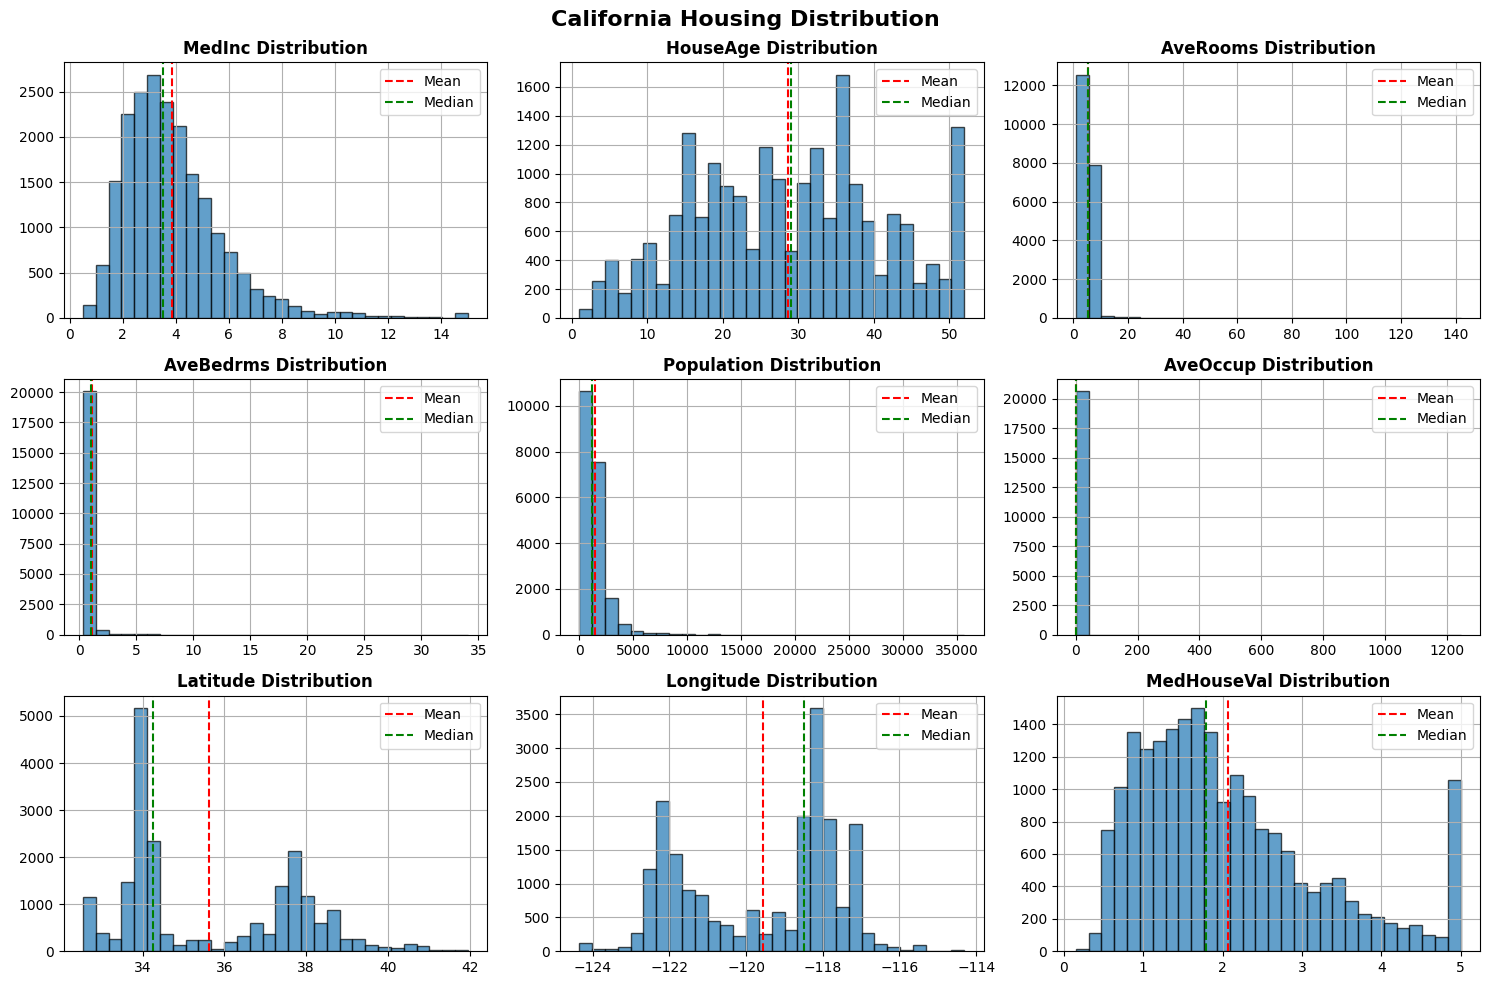

In [5]:
print(f"Dataset shape: {df.shape}")
print(f"\\nColumns: {list(df.columns)}")
print("\\nStructure: "); print(df.describe())

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle('California Housing Distribution', fontsize=16, fontweight='bold')

for ax, col in zip(axes.flatten(), df.columns):
    df[col].hist(bins=30, ax=ax, alpha=0.7, edgecolor='black')
    ax.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    ax.axvline(df[col].median(), color='green', linestyle='--', label='Median')
    ax.set_title(f'{col} Distribution', fontweight='bold')
    ax.legend()

plt.tight_layout()
plt.show()

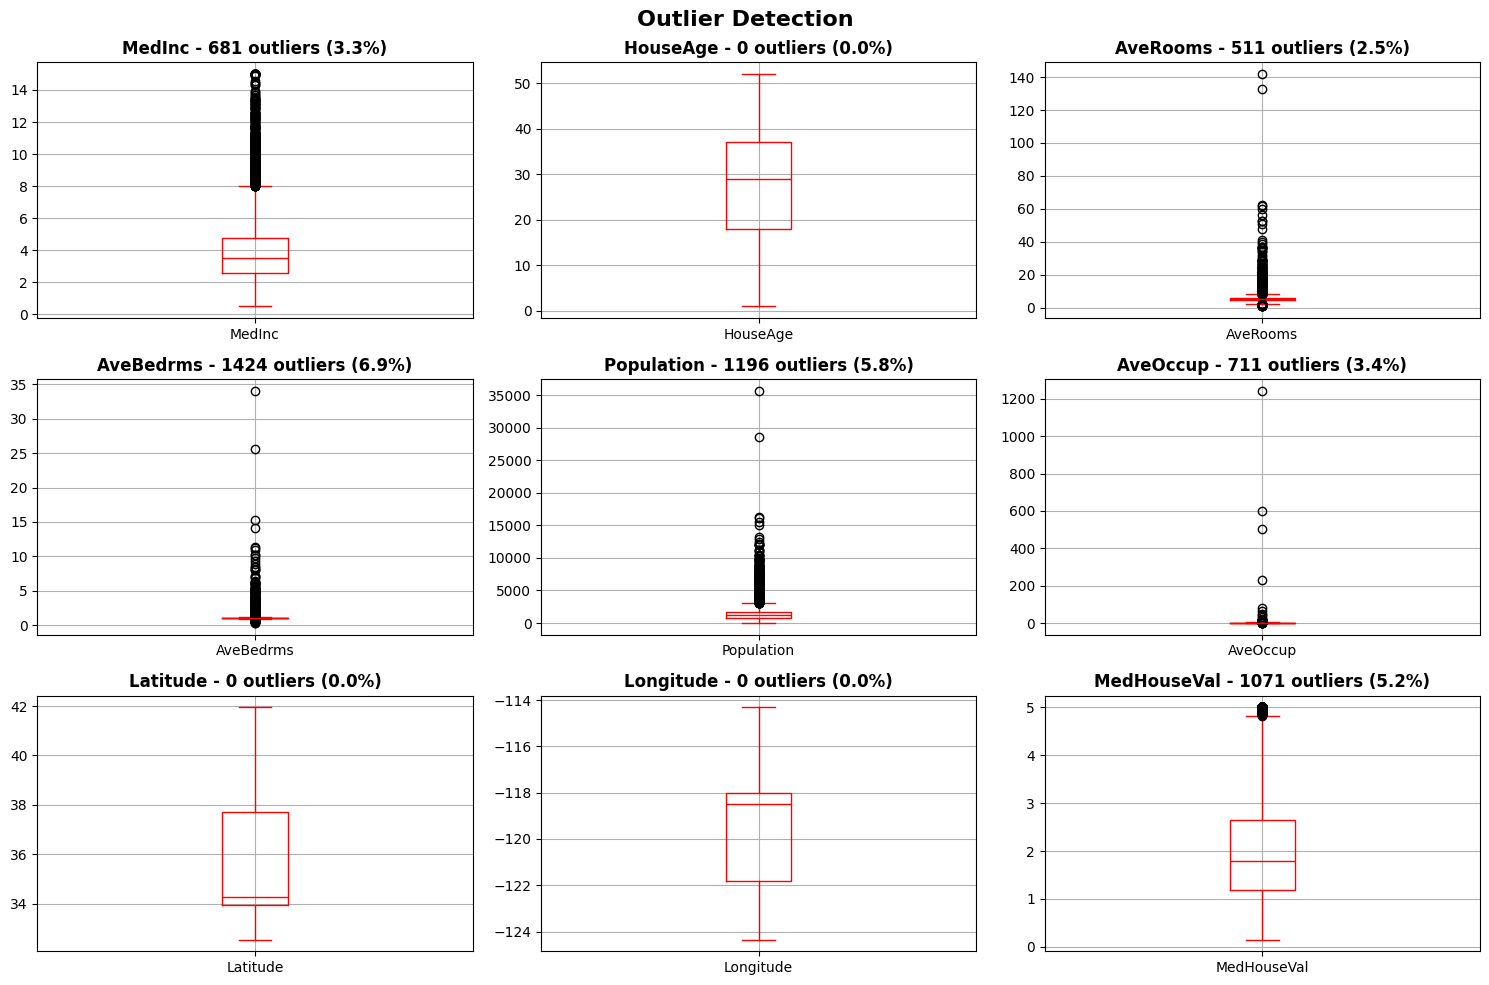

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle('Outlier Detection', fontsize=16, fontweight='bold')

for ax, col in zip(axes.flatten(), df.columns):
    df.boxplot(column=col, ax=ax, color='red')
    
    # Calculate outliers for title info
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    
    ax.set_title(f"{col} - {len(outliers)} outliers ({len(outliers)/len(df):.1%})", fontweight='bold')

plt.tight_layout()
plt.show()